In [1]:
import numpy as np
import ast
import matplotlib.pyplot as plt
import os

In [2]:
path = '/global/homes/v/vboehm/codes/postlimber/output/'

In [3]:
#cosmology
h         = 0.6770
omega_cdm = 0.11923
omega_b   = 0.02247
Omega_b   = omega_b/h**2
Omega_cdm = omega_cdm/h**2
Omega_m   = Omega_b+Omega_cdm
ns        = 0.96824
A0        = 2.10732*10**(-9)

#dictionary for class
cosmo_dict={'h': h,
'omega_b' : omega_b,
'omega_cdm': omega_cdm,
'A_s'    : A0,
'n_s'    : ns,
'k_pivot' : 0.05}
print(cosmo_dict)


c      = 299792458/1000. #km/s

#prefactor for Cl_kk computation from Cl_dd
prefac = 1.5*Omega_m*(100.)**2/c**2 #without h

{'h': 0.677, 'omega_b': 0.02247, 'omega_cdm': 0.11923, 'A_s': 2.10732e-09, 'n_s': 0.96824, 'k_pivot': 0.05}


In [4]:
#get comoving distance from integrating c/H_0/E(z)
def integrand(z):
    return c/(100.)*(Omega_m*(1.+z)**3+(1.-Omega_m))**(-0.5)#Mpc/h

def chi(z):
    z_ = np.arange(0.,z,0.0001)
    res = np.trapz(integrand(z_),z_)
    return res

/global/homes/v/vboehm/.conda/envs/bccp/lib/python3.6/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


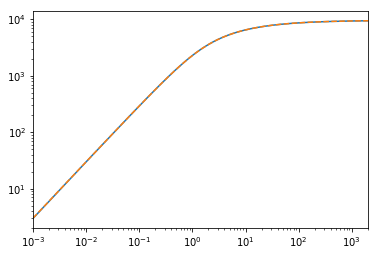

In [5]:
#get z_cmb and comving distance from class

from classy import Class
cosmo = Class()
cosmo.set(cosmo_dict)
cosmo.compute()
cosmo_b               = cosmo.get_background()

class_z               = cosmo_b['z'][::-1]
class_chi             = cosmo_b['comov. dist.'][::-1]

derivParams           = cosmo.get_current_derived_parameters(['z_rec'])
z_cmb                 = derivParams['z_rec']


from scipy.interpolate import InterpolatedUnivariateSpline as ius
chi_z = ius(class_z,class_chi*h)#Mpc/h

#check if interpolation works
z_=np.logspace(-3,3.5)
plt.figure()
plt.loglog(class_z,class_chi*h)
plt.loglog(z_,chi_z(z_),ls='--')
plt.xlim(0,2000)
plt.show()

In [6]:
#read in ells and header of one file, compare chis in header with computed ones
fname= 'C_ell_z1_2.200_z2_2.305_lmin2_lmax2000_nd0.dat'
data = np.loadtxt(path+fname,skiprows=1)
ell  = data[:,0]

with open(path+fname) as f:
    a= f.readline().split(',')
    f.close()
print(a)
print('chi(z1) Class', chi_z(2.200))
print('my chi(z1)', chi(2.200))
print('chi(z2), CLASS',chi_z(2.305))

#set chi_cmb
chi_cmb = chi(z_cmb)*h
print('Distance to CMB:',chi_cmb)

[' C_ell(z1', 'z2)', ' z1 = 2.2', ' z2 = 2.305', ' chi(z1) = 3791.0719', ' chi(z2) = 3884.5413\n']
chi(z1) Class 3787.751296007578
my chi(z1) 3788.35803596693
chi(z2), CLASS 3881.246619773595
Distance to CMB: 6405.286756852273


low z1: [0.4 0.6 0.8]
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1
here1


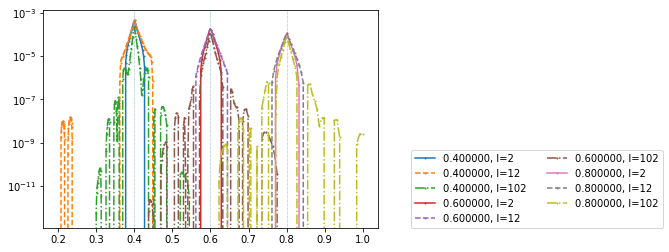

In [24]:
import fnmatch
#not very elegant, but seems to do the job: read in Cdd_ells

# this is the loop for low redshifts

z1s1 = np.arange(0.4,1.0,0.2)
#z1s1 = np.insert(z1s1,0,0.011)

print('low z1:',z1s1)

C_ells1 = []
z2s1 = []
z1_=[]
for z1 in z1s1:
    z2=[]
    C_ells=[]
    for file in os.listdir(path):
        if fnmatch.fnmatch(file, 'C_ell_z1_%.4f_z2*_lmin2_lmax2000_nd0.dat'%z1):
            print('here1')
            z1_+=[z1]
            C_ells +=[np.loadtxt(path+file,skiprows=1)[:,1]]
            
            try:
                z2+=[ast.literal_eval(file[19:26])]
            except:
                try: 
                    z2+=[ast.literal_eval(file[19:25])]
                except:
                    z2+=[ast.literal_eval(file[19:24])]

#         if fnmatch.fnmatch(file, 'C_ell_z1_%.5f_z2*.dat'%z1):
#             print('here2')
#             z1_+=[z1]
#             C_ells +=[np.loadtxt(path+file,skiprows=1)[:,1]]

            
#             try:
#                 z2+=[ast.literal_eval(file[19:25])]
#             except:
#                 try: 
#                     z2+=[ast.literal_eval(file[19:24])]
#                 except:
#                     z2+=[ast.literal_eval(file[19:23])]
    print(len(z2))
    assert(len(z2)==len(np.unique(z2)))
    z2 = np.asarray(z2)
    ii = np.argsort(z2)
    plt.semilogy(z2[ii],np.asarray(C_ells)[ii,0],marker='o',markersize='1',label='%f, l=%d'%(z1,ell[0]))
    plt.semilogy(z2[ii],np.asarray(C_ells)[ii,10],marker='o',ls='--',markersize='1',label='%f, l=%d'%(z1,ell[10]))
    plt.semilogy(z2[ii],np.asarray(C_ells)[ii,100],marker='o',ls='-.',markersize='1',label='%f, l=%d'%(z1,ell[100]))
    plt.axvline(z1,lw=0.5,ls=':')
    z2s1+=[z2]
    C_ells1+=[C_ells]
plt.legend(ncol=2,loc=(1.1,0))
print(z1s1-np.unique(z1_))

high z1: [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4
 4.6 4.8]
62
48
38
32
27
23
20
18
16
14
13
11
10
10
9
8
8
7
7
6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


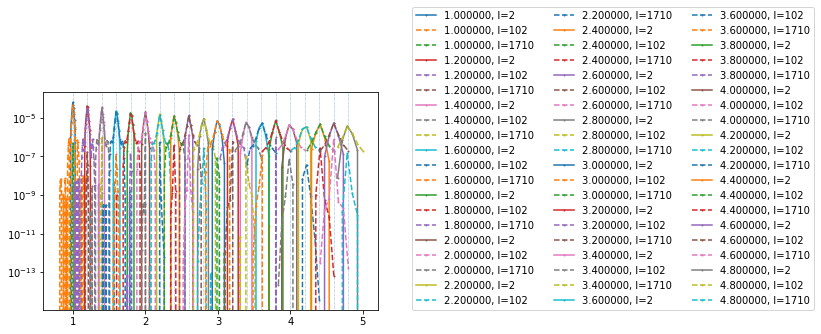

In [16]:
#high redshift z1s
#loop over these z1s
z1s2 = np.arange(1.0,5.0,0.2)

print('high z1:', z1s2)
ll_=0
C_ells2 = []
z2s2 = []
z1_=[]
plt.figure()
for z1 in z1s2:
    z2=[]
    C_ells=[]
    for file in os.listdir(path):
        if fnmatch.fnmatch(file, 'C_ell_z1_%.3f_z2*.dat'%z1):
            z1_+=[z1]
            C_ells+=[np.loadtxt(path+file,skiprows=1)[:,1]]
            try:
                z2+=[ast.literal_eval(file[18:25])]
            except:
                try: 
                    z2+=[ast.literal_eval(file[18:24])]
                except:
                    z2+=[ast.literal_eval(file[18:23])]
                    
    assert(len(z2)==len(np.unique(z2)))
    print(len(z2))
    z2 = np.asarray(z2)
    ii = np.argsort(z2)
    plt.semilogy(z2[ii],np.asarray(C_ells)[ii,0],marker='o',markersize='1',label='%f, l=%d'%(z1,ell[0]))
    plt.semilogy(z2[ii],np.asarray(C_ells)[ii,100],ls='--',marker='o',markersize='1',label='%f, l=%d'%(z1,ell[100]))
    plt.semilogy(z2[ii],np.asarray(C_ells)[ii,500],ls='--',marker='o',markersize='1',label='%f, l=%d'%(z1,ell[500]))
    plt.axvline(z1,lw=0.5,ls=':')
    z2s2+=[z2]
    C_ells2+=[C_ells]
plt.legend(ncol=3,loc=(1.1,0))
print(z1s2-np.unique(z1_))
z2s2=np.asarray(z2s2)

In [25]:

C_ells1 = np.asarray(C_ells1)
C_ells2 = np.asarray(C_ells2)


C_ells  = np.append(C_ells1,C_ells2)

print(C_ells1.shape)
print(C_ells2.shape)
print(C_ells.shape)


z2s1 = np.asarray(z2s1)
z2s2 = np.asarray(z2s2)
z2s  = np.append(z2s1,z2s2)
z2s  = np.asarray(z2s)


print(z2s1.shape)
print(z2s2.shape)
print(z2s.shape)



z1s = np.concatenate((z1s1,z1s2))

print(z1s)

(3,)
(20,)
(23,)
(3,)
(20,)
(23,)
[0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8
 4.  4.2 4.4 4.6 4.8]


In [26]:
def lensing_kernel(chi_max, chi_z):
    def kernel(z):
        chi = chi_z(z)
        return chi*(chi_max-chi)/chi_max*(1.+z)
    return kernel

In [27]:
W = lensing_kernel(chi_cmb, chi_z)

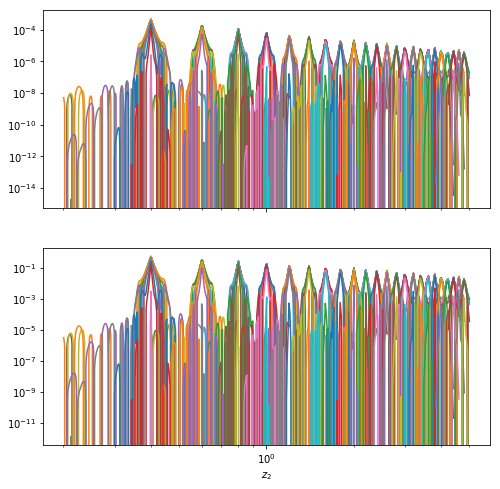

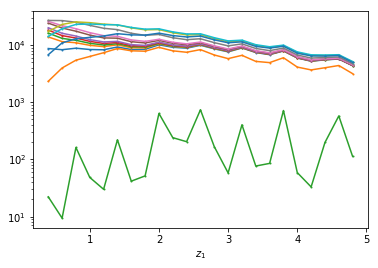

In [28]:
#chi(z1)
chi1 = chi_z(z1s)
CLkk = []
#ell indices
index = [0,2,3,4,5,8,10,20,40,50,100,200,500]
f1, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8,8))
f2, ax = plt.subplots()
for ll in index:
    res=[]
    for jj, z1 in enumerate(z1s):
        z2_ = z2s[jj]
        ii  = np.argsort(z2_)
        z2_ = np.asarray(z2_)
        z2_ = z2_[ii]
        C_ell = np.asarray(C_ells[jj])[ii,ll]
        ax1.loglog(z2_,C_ell,ls='-')
        ax2.loglog(z2_,W(z2_)*C_ell,ls='-')
        res+=[np.trapz(W(z2_)*C_ell,chi_z(z2_))]
    CLkk+=[np.trapz(res*W(z1s),chi1)]
    ax.semilogy(z1s,res*W(z1s),marker='o',markersize=1)
ax2.set_xlabel('$z_2$')   
ax.set_xlabel('$z_1$')
CLkk = np.asarray(CLkk)*prefac**2        
    

In [29]:
L = ell[index]


In [30]:
cosmo_dict={'h': h,
'omega_b' : omega_b,
'omega_cdm': omega_cdm,
'A_s'    : A0,
'n_s'    : ns,
'k_pivot' : 0.05}
cosmo_dict['output']='lCl, tCl'
cosmo_dict['l_max_scalars']=2000
cosmo_dict['lensing']='yes'

In [31]:
cosmo.empty()
cosmo.set(cosmo_dict)

True

In [32]:
cosmo.compute()

In [33]:
cllen= cosmo.lensed_cl(lmax=1000)

In [34]:
ll = cllen['ell']
clpp = cllen['pp']

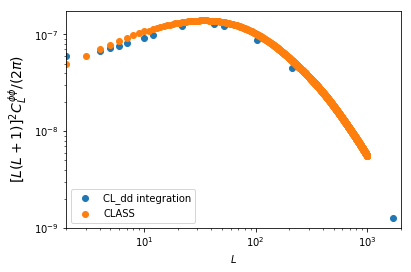

In [37]:
plt.figure()
plt.loglog(L,4*CLkk/2./np.pi,ls='',marker='o',label='CL_dd integration')
plt.loglog(ll,(ll*(ll+1))**2*clpp/2./np.pi,ls='',marker='o',label='CLASS')
#plt.loglog(L,4*(L*(L+1.))**2/L**4*CLkk/2./np.pi,ls='',marker='o',label='prefac correction')
plt.ylabel('$[L(L+1)]^2 C_L^{\phi\phi}/(2 \pi)$',fontsize=14)
plt.xlabel('$L$')
plt.xlim(2,2000)
plt.legend()
plt.savefig('../figures/Cls.png',bbox_inches='tight')
plt.show()